<a href="https://colab.research.google.com/github/robyspace/robyspace/blob/master/DentalDiagnosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
%cd "drive/My Drive/Projects_2020/BoneLoss_Classification"


/content/drive/My Drive/Projects_2020/BoneLoss_Classification


In [0]:
!python 1_vgg16_pretrain.py --train_dir train --val_dir validation

2020-05-09 10:10:02.639589: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Using TensorFlow backend.
Found 63 images belonging to 2 classes.
Found 28 images belonging to 2 classes.
loading the model and the pre-trained weights...
2020-05-09 10:10:04.844173: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-05-09 10:10:04.868229: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-05-09 10:10:04.869179: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla K80 computeCapability: 3.7
coreClock: 0.8235GHz coreCount: 13 deviceMemorySize: 11.17GiB deviceMemoryBandwidth: 223.96GiB/s
2020-05-09 10:10:04.869241: I tensorflow/stream_executor/plat

Using TensorFlow backend.


[[0.9406026  0.05939744]]
Bone Loss Detected..


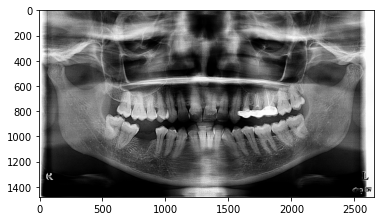

In [0]:
from network import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np
import argparse
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

base_model = VGG16.VGG16(include_top=False, weights=None)
x = base_model.output
x = Dense(128)(x)
x = GlobalAveragePooling2D()(x)
predictions = Dense(2, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.load_weights("cv-tricks_pretrained_model.h5")

inputShape = (224,224) # Assumes 3 channel image
image = load_img('test.jpg', target_size=inputShape)
image = img_to_array(image)   # shape is (224,224,3)
image = np.expand_dims(image, axis=0)  # Now shape is (1,224,224,3)

image = image/255.0

preds = model.predict(image)
import cv2
img = cv2.imread('test.jpg')
plt.imshow(img)
print(preds)
if (preds[0][0] > 0.6):
    print('Bone Loss Detected..')
else:
    print("No Bone Loss Detected..")


[[0.06284785 0.93715215]]
No Bone Loss Detected..


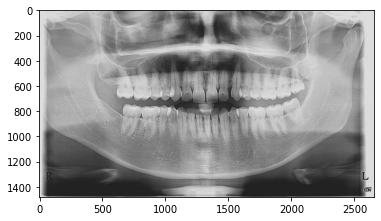

In [0]:
from network import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np
import argparse
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
testimage = 'test_nor.jpg'
base_model = VGG16.VGG16(include_top=False, weights=None)
x = base_model.output
x = Dense(128)(x)
x = GlobalAveragePooling2D()(x)
predictions = Dense(2, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.load_weights("cv-tricks_pretrained_model.h5")

inputShape = (224,224) # Assumes 3 channel image
image = load_img(testimage, target_size=inputShape)
image = img_to_array(image)   # shape is (224,224,3)
image = np.expand_dims(image, axis=0)  # Now shape is (1,224,224,3)

image = image/255.0

preds = model.predict(image)
import cv2
img = cv2.imread(testimage)
plt.imshow(img)
print(preds)

if (preds[0][0] > 0.6):
    print('Bone Loss Detected..')
else:
    print("No Bone Loss Detected..")



[[0.91427714 0.08572282]]
Bone Loss Detected..


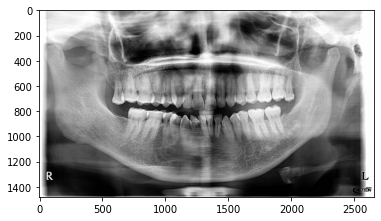

In [0]:
from network import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np
import argparse
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
testimage = 'test_abn.jpg'
base_model = VGG16.VGG16(include_top=False, weights=None)
x = base_model.output
x = Dense(128)(x)
x = GlobalAveragePooling2D()(x)
predictions = Dense(2, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.load_weights("cv-tricks_pretrained_model.h5")

inputShape = (224,224) # Assumes 3 channel image
image = load_img(testimage, target_size=inputShape)
image = img_to_array(image)   # shape is (224,224,3)
image = np.expand_dims(image, axis=0)  # Now shape is (1,224,224,3)

image = image/255.0

preds = model.predict(image)
import cv2
img = cv2.imread(testimage)
plt.imshow(img)
print(preds)

if (preds[0][0] > 0.6):
    print('Bone Loss Detected..')
else:
    print("No Bone Loss Detected..")

